# Scipy

It’s a package that utilizes NumPy arrays and manipulations to take on standard problems that scientists and engineers commonly face: integration, determining a function’s maxima or minima, finding eigenvectors for large sparse matrices, testing whether two distributions are the same, and much more. 

We will cover just the basics here, which will allow you to take advantage of the more complex features in SciPy by going through easy examples that are applicable to real-world problems

## Scipy For Linear Algebra

We will start with the treatment of matrices (whether normal or sparse) with the modules on Linear Algebra—linalg and sparse. Note that linalg expands on the NumPy module with the same name.

In [139]:
import numpy as np

vectorA = np.array([5, 6, 7])
vectorB = np.array([7, 6, 5])
crossProduct = np.cross(vectorA,vectorB)
print(crossProduct)

# Further, we perform a cross operation of vectorB over vectorA:
crossProduct = np.cross(vectorB,vectorA)
print(crossProduct)

[-12  24 -12]
[ 12 -24  12]


A matrix is said to be sparse if most of its entries are zero.
SciPy provides different procedures to store such matrices effectively in memory. Most of the usual methods to input sparse matrices are contemplated in SciPy as routines in the scipy.sparse module. Some of those methods are block sparse row (bsr_matrix), coordinate format (coo_matrix), compressed sparse column or row (csc_matrix, csr_matrix), sparse matrix with diagonal storage (dia_matrix), dictionary with Keys-based sorting (dok_matrix), and Row-based linked list (lil_matrix).

In [140]:
rows=np.array([0,1,2,3])
cols=np.array([1,2,3,4])
vals=np.array([10,20,30,40])

# We create the matrix A as follows:
import scipy.sparse
A=scipy.sparse.coo_matrix( (vals,(rows,cols)) )
print (A); print (A.todense())

  (0, 1)	10
  (1, 2)	20
  (2, 3)	30
  (3, 4)	40
[[ 0 10  0  0  0]
 [ 0  0 20  0  0]
 [ 0  0  0 30  0]
 [ 0  0  0  0 40]]


### Stacking matrices with bmat command

In [143]:
B=np.mat(np.ones((3,3)))
W=np.mat(np.zeros((3,3)))
print (np.bmat('B,W;W,B'))

# The output is shown as follows:
# [[ 1.  1.  1.  0.  0.  0.]
#  [ 1.  1.  1.  0.  0.  0.]
#  [ 1.  1.  1.  0.  0.  0.]
#  [ 0.  0.  0.  1.  1.  1.]
#  [ 0.  0.  0.  1.  1.  1.]
#  [ 0.  0.  0.  1.  1.  1.]]

[[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1.]]


In [144]:
a=np.array([[1,2],[3,4]])
b=np.array([[1,2,3],[3,4,5]])

In [146]:
A = np.matrix(np.dot(a,b))

In [147]:
A

matrix([[ 7, 10, 13],
        [15, 22, 29]])

In [150]:
A.T

matrix([[ 7, 15],
        [10, 22],
        [13, 29]])

In [151]:
A.dot(A.T)

matrix([[ 318,  702],
        [ 702, 1550]])

In [152]:
import scipy.linalg as slin
slin.expm(A.dot(A.T))

array([[-11874.98146147, -19162.1059127 ],
       [ 45234.98898361,  72988.42686875]])

### EigenValue problems and matrix decomposition

In [156]:
A = np.matrix([[1,-3,-3],[3,-5,-3],[6,-6,4]])
A

matrix([[ 1, -3, -3],
        [ 3, -5, -3],
        [ 6, -6,  4]])

In [157]:
slin.eigvals(A)

array([-2.+7.8444124e-08j, -2.-7.8444124e-08j,  4.+0.0000000e+00j])

Eigen values are 4 and -2

In [160]:
e_val, e_vec = slin.eig(A)

In [161]:
e_val, e_vec

(array([-2.+7.8444124e-08j, -2.-7.8444124e-08j,  4.+0.0000000e+00j]),
 array([[ 7.07106781e-01+0.00000000e+00j,  7.07106781e-01-0.00000000e+00j,
         -4.08248290e-01+0.00000000e+00j],
        [ 7.07106781e-01-9.24472868e-09j,  7.07106781e-01+9.24472868e-09j,
         -4.08248290e-01+0.00000000e+00j],
        [-3.21063990e-16-9.24472868e-09j, -3.21063990e-16+9.24472868e-09j,
          8.16496581e-01+0.00000000e+00j]]))

### SVD - Image Compression via SVD

Singular value decomposition: This function allows us to use the svd command. To compute the singular values, we issue svdvals. If we wish to compose the sigma matrix in the singular value decomposition from its singular values, we do so with the diagsvd routine. If we wish to compute an orthogonal basis for the range of a matrix using SVD, we can accomplish this with the orth command.

This is a very simple application where a square image A of size n x n, and stored as ndarray is regarded as a matrix, and where a singular value decomposition (SVD) is performed on it. This operation is visible in the following diagram:

![Fig](imgs/scipy_003.png)

From all the singular values of s we choose a fraction, together with their corresponding left and right singular vectors u, v. We compute a new matrix by collecting them according to the formula given in the following diagram:

![Fig](imgs/scipy_004.png)

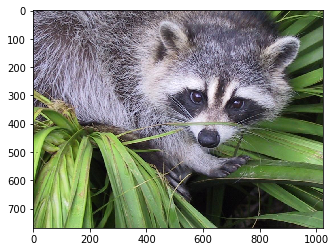

In [191]:
import scipy.misc
from scipy.linalg import svd
import matplotlib.pyplot as plt
img=scipy.misc.face()
plt.imshow(img)

In [192]:
img.shape

(768, 1024, 3)

In [193]:
import cv2
img = cv2.resize(img, (512,512),  interpolation = cv2.INTER_CUBIC)

In [194]:
img.shape

(512, 512, 3)

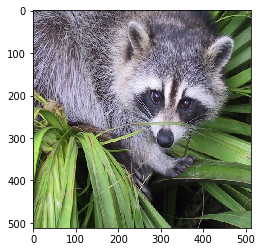

In [198]:
plt.imshow(img)

In [201]:
img = np.matrix(img[:,:,0])

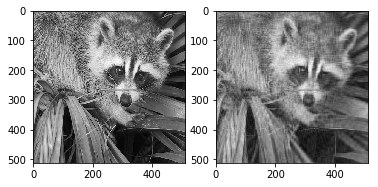

In [202]:
U,s,Vh=svd(img)      # Singular Value Decomposition
A = np.dot( U[:,0:32],  # use only 32 singular values
              np.dot( np.diag(s[0:32]),Vh[0:32,:]))
plt.subplot(121,aspect='equal'); plt.imshow(img); 
plt.subplot(122,aspect='equal'); plt.imshow(A)
plt.show()

## Optimization and Minimization

The optimization package in SciPy allows us to solve minimization problems easily and
quickly. What is minimization and how can it help you with your work? Some
classic examples are performing linear regression, finding a function’s minimum and
maximum values, determining the root of a function, and finding where two functions
intersect.

### Data Modeling and Fitting

There are several ways to fit data with a linear regression. In this section we will use
curve_fit, which is a χ2-based method (in other words, a best-fit method). In the
example below, we generate data from a known function with noise, and then fit the
noisy data with curve_fit. The function we will model in the example is a simple linear
equation, f (x) = ax + b.

In [1]:
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Creating a function to model and create data
def func(x, a, b):
    return a*x+b

# Generating clean data
x = np.linspace(0, 10, 100)
y = func(x, 1, 2)

# Adding noise to the data
yn = y + 0.9 * np.random.normal(size=len(x))

# Executing curve_fit on noisy data
popt, pcov = curve_fit(func, x, yn)

# popt returns the best fit values for parameters of
# the given model (func).
print(popt)

[1.00655759 1.87126155]


In [10]:
y_ret = 1.00655759*x + 1.87126155

Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized

pcov : 2d array
The estimated covariance of popt. The diagonals provide the variance of the parameter estimate. To compute one standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov)).


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

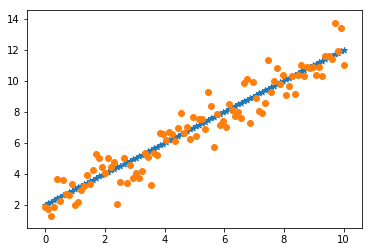

In [14]:
plt.scatter(x, y, marker='*')
plt.scatter(x, yn)


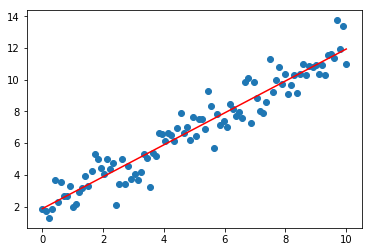

In [15]:
plt.scatter(x, yn)
plt.plot(x, y_ret, color='red')

### Solution to Functions

Let’s start simply, by solving for the root of an equation

Assume the following function:

f(x) = x * cos(x-4)


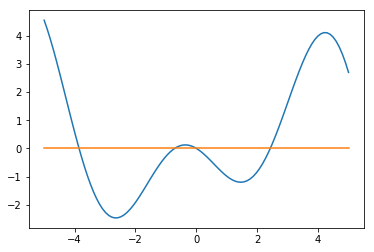

In [54]:
import math

f = lambda x: x * np.cos(x-4)
x = np.linspace(-5,5,100)

plt.plot(x, f(x))
plt.plot(x, np.zeros(len(x)))

In [56]:
from scipy.optimize import fsolve
solution = fsolve(f, -3.9) # -3.9 is a guess
print(solution)

[-3.85398163]


In [57]:
from scipy.optimize import fsolve
solution = fsolve(f, -1) # -3.9 is a guess
print(solution)

[-0.71238898]


In [58]:
from scipy.optimize import fsolve
solution = fsolve(f, 0) # -3.9 is a guess
print(solution)

[0.]


In [59]:
from scipy.optimize import fsolve
solution = fsolve(f, 2.2) # -3.9 is a guess
print(solution)

[2.42920367]


[1.]


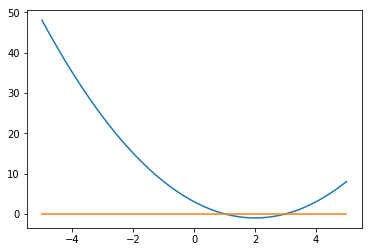

In [39]:
from scipy.optimize import fsolve
import numpy as np

curve = lambda x:x**2 - 4*x +3
x = np.linspace(-5,5,100)
plt.plot(x, curve(x))
plt.plot(x, np.zeros(len(x)))
solution = fsolve(curve, 0.9)
print(solution)

In [40]:
solution = fsolve(curve, 2.8)
print(solution)

[3.]


### Interpolation

Data that contains information usually has a functional form, and as analysts we want
to model it. Given a set of sample data, obtaining the intermediate values between the
points is useful to understand and predict what the data will do in the non-sampled domain.
SciPy offers well over a dozen different functions for interpolation, ranging from
those for simple univariate cases to those for complex multivariate ones. Univariate
interpolation is used when the sampled data is likely led by one independent variable,
whereas multivariate interpolation assumes there is more than one independent
variable.

There are two basic methods of interpolation: (1) Fit one function to an entire dataset
or (2) fit different parts of the dataset with several functions where the joints of each
function are joined smoothly. The second type is known as a spline interpolation, which
can be a very powerful tool when the functional form of data is complex. We will
first show how to interpolate a simple function, and then proceed to a more complex
case

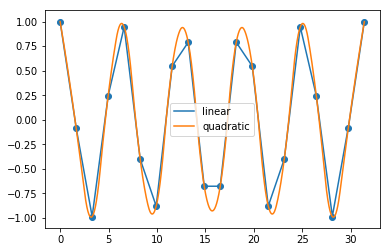

In [63]:
import numpy as np
from scipy.interpolate import interp1d

# Setting up fake data
x = np.linspace(0, 10 * np.pi, 20)
y = np.cos(x)

plt.scatter(x,y)

# Interpolating data
fl = interp1d(x, y, kind='linear')
fq = interp1d(x, y, kind='quadratic')

# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yintl = fl(xint)
yintq = fq(xint)
plt.plot(xint, yintl, label='linear')
plt.plot(xint, yintq, label='quadratic')
plt.legend()

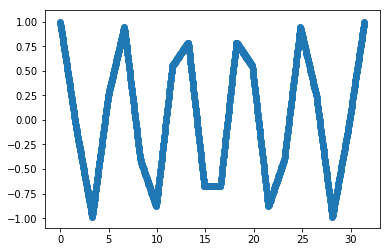

In [64]:
plt.scatter(xint, yintl, label='linear')

### Interpolate noisy data

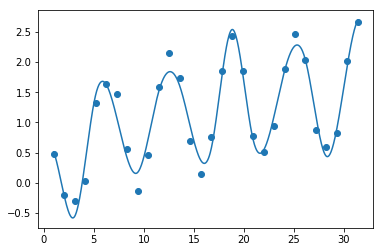

In [65]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.interpolate import UnivariateSpline

# Setting up fake data with artificial noise
sample = 30
x = np.linspace(1, 10 * np.pi, sample)
y = np.cos(x) + np.log10(x) + np.random.randn(sample) / 10
plt.scatter(x,y)

# Interpolating the data
f = UnivariateSpline(x, y, s=1)

# x.min and x.max are used to make sure we do not
# go beyond the boundaries of the data for the
# interpolation.
xint = np.linspace(x.min(), x.max(), 1000)
yint = f(xint)
plt.plot(xint, yint, label='UVSpline')

### Integration

Integration is a crucial tool in math and science, as differentiation and integration are
the two key components of calculus. Given a curve from a function or a dataset, we
can calculate the area below it. In the traditional classroom setting we would integrate
a function analytically, but data in the research setting is rarely given in this form, and
we need to approximate its definite integral.

We will implement the following integration

![Fig](imgs/scipy_001.png)

In [66]:
from scipy.integrate import quad
# Defining function to integrate
func = lambda x: np.cos(np.exp(x)) ** 2

# Integrating function with upper and lower
# limits of 0 and 3, respectively
solution = quad(func, 0, 3)
print(solution)

# The first element is the desired value
# and the second is the error.
# (1.296467785724373, 1.397797186265988e-09)

(1.296467785724373, 1.3977971863744082e-09)


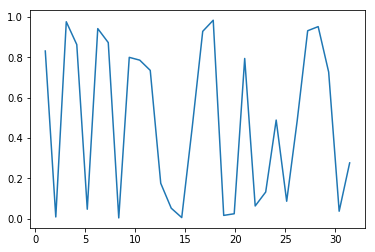

In [69]:
x = np.linspace(1, 10 * np.pi, sample)
y = func(x)
plt.plot(x,y)

### Numerical Integration

In [70]:
from scipy.integrate import quad, trapz

# Setting up fake data
x = np.sort(np.random.randn(150)*4+ 4).clip(0,5)
func = lambda x: np.sin(x) * np.cos(x ** 2) + 1
y = func(x)

# Integrating function with upper and lower
# limits of 0 and 5, respectively
fsolution = quad(func, 0, 5)
dsolution = trapz(y, x=x)

print('fsolution='+ str(fsolution[0]))
print('dsolution='+ str(dsolution))
print('The difference is ' + str(np.abs(fsolution[0] - dsolution)))

fsolution=5.100345067540932
dsolution=5.1202357637390215
The difference is 0.019890696198089586


## Statistics

In [71]:
# Constructing a random array with 1000 elements
x = np.random.randn(1000)

# Calculating several of the built-in methods
# that numpy.array has
mean = x.mean()
std = x.std()
var = x.var()

### Continuous and discrete distributions

There are roughly 80 continuous distributions and over 10 discrete distributions.
Twenty of the continuous functions are shown in Figure as probability density
functions (PDFs) to give a visual impression of what the scipy.stats package provides.
These distributions are useful as random number generators, similar to the functions
found in numpy.random. Yet the rich variety of functions SciPy provides stands in contrast
to the numpy.random functions, which are limited to uniform and Gaussian-like
distributions.

When we call a distribution from scipy.stats, we can extract its information in several
ways: probability density functions (PDFs), cumulative distribution functions (CDFs),
random variable samples (RVSs), percent point functions (PPFs), and more. 

Defn: The cumulative distribution function (CDF) of a real-valued random variable  X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x. Percent point function is the inverse of CDF.

![Fig](imgs/scipy_002.png)

In [74]:
from scipy.stats import norm

# Set up the sample range
x = np.linspace(-5,5,1000)

# Here set up the parameters for the normal distribution,
# where loc is the mean and scale is the standard deviation.

dist = norm(loc=0, scale=1)

# Retrieving norm's PDF and CDF
pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Here we draw out 500 random values from the norm.
sample = dist.rvs(500)

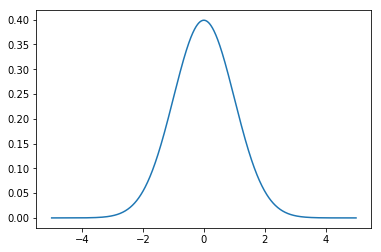

In [75]:
plt.plot(x, pdf)

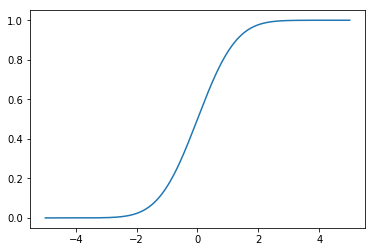

In [76]:
plt.plot(x, cdf)

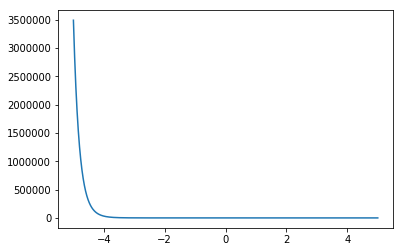

In [77]:
plt.plot(x, 1/cdf)

Unlike continuous distributions, discrete distributions are useful for problems
where a given number of events occur in a fixed interval of time/space, the events occur
with a known average rate, and each event is independent of the prior event

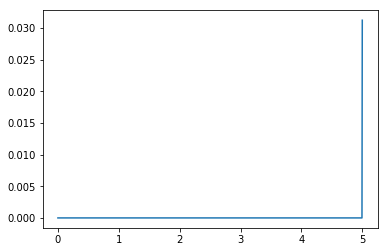

In [78]:
from scipy.stats import geom

# Here set up the parameters for the geometric distribution.
p = 0.5
dist = geom(p)

# Set up the sample range.
x = np.linspace(0, 5, 1000)

# Retrieving geom's PMF and CDF
pmf = dist.pmf(x)
cdf = dist.cdf(x)

# Here we draw out 500 random values.
sample = dist.rvs(500)

plt.plot(x, pmf)

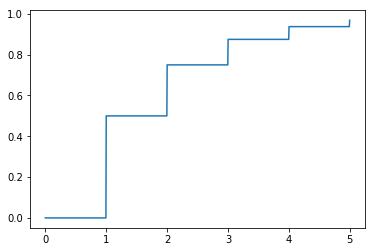

In [79]:
plt.plot(x, cdf)

## Spatial and Clustering Analysis

From biological to astrophysical sciences, spatial and clustering analysis are key to identifying
patterns, groups, and clusters. In biology, for example, the spacing of different
plant species hints at how seeds are dispersed, interact with the environment, and grow.
In astrophysics, these analysis techniques are used to seek and identify star clusters,
galaxy clusters, and large-scale filaments (composed of galaxy clusters). In the computer
science domain, identifying and mapping complex networks of nodes and information
is a vital study all on its own

SciPy provides a spatial analysis class (scipy.spatial) and a cluster analysis class
(scipy.cluster). The spatial class includes functions to analyze distances between data
points (e.g., k-d trees). The cluster class provides two overarching subclasses: vector
quantization (vq) and hierarchical clustering (hierarchy). Vector quantization groups
large sets of data points (vectors) where each group is represented by centroids. The
hierarchy subclass contains functions to construct clusters and analyze their substructures.

### Vector Quantization

Vector quantization is a general term that can be associated with signal processing, data
compression, and clustering. Here we will focus on the clustering component, starting
with how to feed data to the vq package in order to identify clusters.

In [101]:
from scipy.cluster import vq

# Creating data
c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50, 2)
f = lambda x: x + 100

# Pooling all the data into one 180 x 2 array
data = np.vstack([c1, c2, c3])
print(data.shape)

(180, 2)


In [102]:
# Calculating the cluster centroids and variance
# from kmeans
centroids, variance = vq.kmeans(data, 3)
print(centroids.shape, centroids, variance.shape)

# The identified variable contains the information
# we need to separate the points in clusters
# based on the vq function.
identified, distance = vq.vq(data, centroids)

# Retrieving coordinates for points in each vq
# identified core
vqc1 = data[identified == 0]
vqc2 = data[identified == 1]
vqc3 = data[identified == 2]

(3, 2) [[-5.19235946e+00 -5.05055429e+00]
 [ 4.95981263e+00  4.96210008e+00]
 [ 2.36610831e-02  3.27305186e-03]] ()


In [128]:
vqc1.shape, vqc2.shape, vqc3.shape

((30, 2), (100, 2), (50, 2))

Text(-11, 10, 'Predicted')

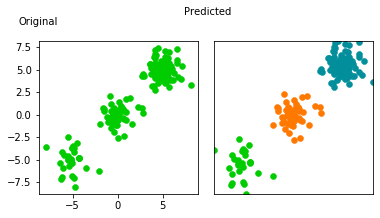

In [137]:
fig = mpl.figure()
fig.subplots_adjust(hspace=0.1, wspace=0.1)

ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(data[:,0], data[:,1], lw=0.5, color='#00CC00')
ax1.text(-11, 10, 'Original')

ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(vqc1[:,0], vqc1[:,1], lw=0.5, color='#00CC00')
ax2.scatter(vqc2[:,0], vqc2[:,1], lw=0.5, color='#028E9B')
ax2.scatter(vqc3[:,0], vqc3[:,1], lw=0.5, color='#FF7800')
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
x1 = np.min(data[:,0])
x2 = np.max(data[:,0])

y1 = np.min(data[:,1])
y2 = np.max(data[:,1])

ax2.set_xlim(x1, x2)
ax2.set_ylim(y1, y2)
ax2.text(-11, 10, 'Predicted')

### Hierarchical Clustering

Hierarchical clustering is a powerful tool for identifying structures that are nested
within larger structures. But working with the output can be tricky, as we do not get
cleanly identified clusters like we do with the kmeans technique. Below is an example
wherein we generate a system of multiple clusters. 

### Sparse Matrices

With NumPy we can operate with reasonable speeds on arrays containing 106 elements.
Once we go up to 107 elements, operations can start to slow down and Python’s memory
will become limited, depending on the amount of RAM available. What’s the best
solution if you need to work with an array that is far larger—say, 1010 elements? If
these massive arrays primarily contain zeros, then you’re in luck, as this is the property
of sparse matrices. If a sparse matrix is treated correctly, operation time and memory
usage can go down drastically

You can determine the byte size of a numpy.array by calling its method
nbytes. This can be especially useful when trying to determine what is
hogging memory in your code. To do the same with sparse matrices, you
can use data.nbytes.

In [126]:
from scipy.sparse.linalg import eigsh
from scipy.linalg import eigh
import scipy.sparse
import time
N = 3000

# Creating a random sparse matrix
m = scipy.sparse.rand(N, N)

# Creating an array clone of it
a = m.toarray()
print('The numpy array data size: ' + str(a.nbytes) + ' bytes')
print('The sparse matrix data size: ' + str(m.data.nbytes) + ' bytes')

# Non-sparse
t0 = time.time()
res1 = eigh(a)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Non-sparse operation takes ' + dt)

# Sparse
t0 = time.time()
res2 = eigsh(m)
dt = str(np.round(time.time() - t0, 3)) + ' seconds'
print('Sparse operation takes ' + dt)

The numpy array data size: 72000000 bytes
The sparse matrix data size: 720000 bytes
Non-sparse operation takes 3.604 seconds
Sparse operation takes 0.32 seconds
